## PRESENT VALUES
- This lecture describes the present value model that is a starting point of much asset pricing theory.
- Let $\{d_t\}^T_{t=0}$ be sequence of dividends
- Let $\{p_t\}^T_{t=0}$ be sequence of prices of a claim ont he *continuation* of the asset stream from $t$ onwards: $\{d_s\}_{s=t}^T$
- $\delta \in (0,1)$ is 1-period discount factor
- $p^*_{T+1}$ is terminal price of asset at time $T+1$

Assume dividend stream and terminal price is *exogenous*

Assume the sequence of asset-pricing equations: 

$$ p_t = d_t + \delta p_{t+1}$$ 

- which says: the cost of buying the asset today equals the reward for holding it for one period (which is the dividend
$d_t$) and then selling it at $t + 1$ 
- want to solve for asset price sequence $\{p_t\}$

We do it by writing the $T + 1$ asset pricing equations as: 

![Matrix Equation](./images/LD_PV_MAT.png)`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We can write this as $Ap = d + b$ and the solution is $p = A^{-1}(d + b)$

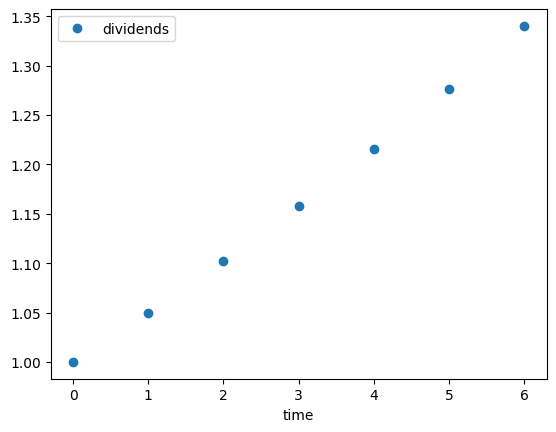

In [2]:
# example: given dividend stream d' = 1.05d
T = 6
current_d = 1.0  # initialize current dividend as = 1
d = []
for t in range(T + 1):
    d.append(current_d)
    current_d *= 1.05

fig, ax = plt.subplots()
ax.plot(d, 'o', label='dividends')
ax.legend()
ax.set_xlabel('time')
plt.show()

In [3]:
delta = 0.99
p_star = 10.0 # final price 

# now construct matrix A 
A = np.zeros((T + 1, T + 1)) # initialize A as a zero matrix
for i in range(T + 1):
    for j in range(T + 1):
        if i == j:
            A[i, j] = 1
            if j < T: # because this is for when i == j - so we set j + 1 to -delta
                A[i, j + 1] = -delta


# look at A 
A 

array([[ 1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

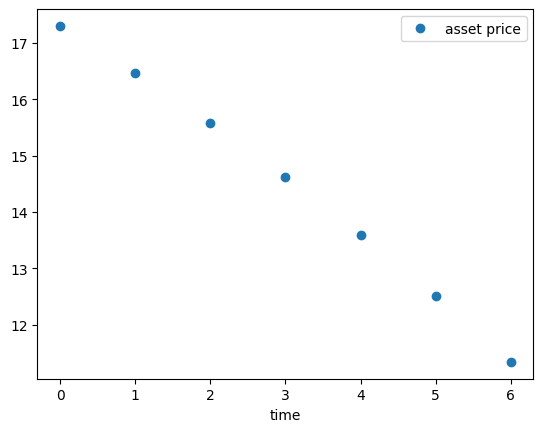

In [4]:
# solve for prices
b = np.zeros(T + 1)
b[-1] = p_star # last entry is p_star
# solve using linalg.solve
p = np.linalg.solve(A, d + b)

# plot prices
fig, ax = plt.subplots()
ax.plot(p, 'o', label='asset price')
ax.legend()
ax.set_xlabel('time')
plt.show()




- Suppose we instead wanted to consider a *cyclically growing dividend sequence*
$$ d_{t+1} = 1.0d_t + 0.1\sin t$$

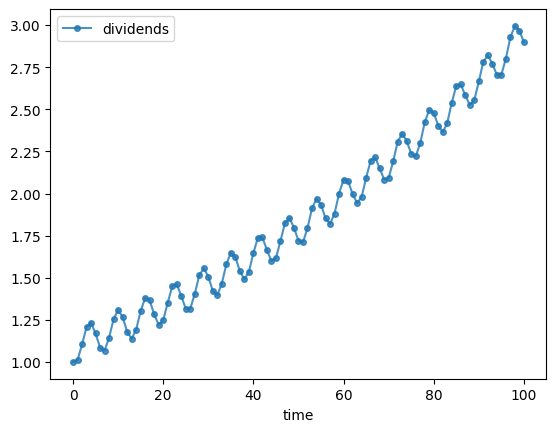

In [7]:
T = 100
current_d = 1.0
d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.01 + 0.1 * np.sin(t)

fig, ax = plt.subplots()
ax.plot(d, 'o-', ms=4, alpha=0.8, label='dividends')
ax.legend()
ax.set_xlabel('time')
plt.show()

It can be verified that $A^{-1}$ is:

![Matrix Equation](./images/INV_A.png)


In [ ]:
# now construct matrix inverse of A 

A = np.zeros((T + 1, T + 1)) # initialize A as a zero matrix
for i in range(T + 1):
    for j in range(T + 1):
        if i == j:
            A[i, j] = 1
        if i < j:
            A[i, j] = delta ** (j - i)